# Projet numérique : câble sous-marin

## Questions théoriques

1) La loi des grands nombres permet, pour un nombre suffisamment important de simulations conditionnelles, d'estimer l'espérance conditionnelle comme la moyenne empirique de simulations conditionnelles.

2) On note $U$ le vecteur des composantes de $Z$ correspondant aux points de discrétisation sans observation, $V$ celui correspondant aux points de discrétisation avec observation. 
La loi conditionnelle de U sachant $V=v$ est définie par la densité conditionnelle suivante : 
$f_{U|V = v}(u) = \frac{1}{(2\pi)^{n/2}\sqrt{\det(CS_{U})}}\exp(-\frac{1}{2}(u - m_{U|V=v}){}^tCS_{U}^{-1}(u-m_{U|V=v})$.
En effet, le vecteur des profondeurs $Z$ est gaussien à densité et (au réordonnement des indices près) est tel que $Z = (Z_{1},\ldots,Z_{N})$ avec $U = (Z_1 ,\ldots,Z_{N-n+1}$ et $V = (Z_{N-n},\ldots,Z_N)$.
$CS_{U}$ désigne le complément de Schur du bloc $C_U$ de la matrice de covariance $C$ de $Z$ définie par blocs : $\begin{pmatrix} C_U&C_{U,V} \\ C_{V,U}&C_{V} \end{pmatrix}$ où $C_U = Cov(U,U)$, $C_Z = Cov(V,V)$ et $C_{U,V} = Cov(U,V)$.
On a donc $CS_U = C_U - C_{U,V}C_{V}^{-1}C_{V,U}$.
$m_{U|V=v} = m_U + C_{U,V}C_{V}^{-1}(v-m_V)$ est l'espérance conditionnelle de $U$ sachant $V$ ;  et CS_U est la covariance conditionnelle de $U$ sachant $V$.

3) Si $Y = (Y_1,\ldots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, alors le vecteur $Z=m+RY$ (où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$) est gaussien d'espérance $m$ et de matrice de covariance $RR^{t}$.

4) Algorithme de simulation conditionnelle :
Calcul de la matrice de covariance du vecteur des profondeurs $Z$, grâce à la fonction $C$.
On extrait de cette matrice les blocs $C_U$, $C_{U,V}$, $C_{V,U}$,$C_V$ (on tient compte des indices des points d'observation).
Calcul de l'espérance conditionnelle $m$ de $U$ sachant $V$, grâce aux blocs extraits à l'étape précédente.
Calcul de la covariance conditionnelle $CS_U$. Comme la matrice de covariance $C$ du vecteur des profondeurs $Z$ est définie positive, $CS_U$ est aussi définie positive, on peut donc écrire sa décomposition de Cholesky $CS_U = RR^{t}$.
Simulation d'un vecteur gaussien $Y$ de $k$ variables indépendantes d'espérance nulle et de variance 1 (où $k$ est le nombre de points de discrétisation sans observation).
Calcul de $U = m + RY$.
On ainsi effectué une simulation conditionnelle de $U$ sachant $V = v$.

## Données

In [1]:
import numpy as np
from math import*
import matplotlib.pyplot as plt

In [3]:
# Discrétisation

A = 0
B = 500
N = 101  #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = Delta * discretization_indexes

# Paramètres du modèle

a = 50
sigma_2 = 12
mu = -5

# Données

observation_indexes = [k for k in range(0, N, 20)]
depth = np.array([0, -4, -12.8, -1, -6.5, 0])

# Indices des composants correspondants aux observations et aux composantes non observ&es

unknown_indexes = list(set(discretization_indexes) - set(observation_indexes))

## Questions

### Covariance

In [7]:
def covariance(a, sigma2, h) :
    return sigma2 * np.exp(-np.abs(h)/a)

X = np.linspace(A, B, N)
distance = np.array([[X[i] - X[j] for j in range(N)] for i in range(N)])
print(f"distances : {distance}")

Sigma = covariance(a, sigma_2, distance)
print(f"matrice de covariance : {Sigma}")

distances : [[   0.   -5.  -10. ... -490. -495. -500.]
 [   5.    0.   -5. ... -485. -490. -495.]
 [  10.    5.    0. ... -480. -485. -490.]
 ...
 [ 490.  485.  480. ...    0.   -5.  -10.]
 [ 495.  490.  485. ...    5.    0.   -5.]
 [ 500.  495.  490. ...   10.    5.    0.]]
matrice de covariance : [[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 6.65419193e-04
  6.02096185e-04 5.44799157e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 7.35401941e-04
  6.65419193e-04 6.02096185e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 ...
 [6.65419193e-04 7.35401941e-04 8.12744838e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [6.02096185e-04 6.65419193e-04 7.35401941e-04 ... 1.08580490e+01
  1.20000000e+01 1.08580490e+01]
 [5.44799157e-04 6.02096185e-04 6.65419193e-04 ... 9.82476904e+00
  1.08580490e+01 1.20000000e+01]]


### Extraction

In [10]:
cov_obs, cov_inc, cov_inc_obs, cov_obs_inc = [], [], [], []

for i, L in enumerate(Sigma) :
    for j, c in enumerate(L) :
        if i in observation_indexes and j in observation_indexes :
            cov_obs.append(c)
        elif i in unknown_indexes and j in unknown_indexes :
            cov_inc.append(c)
        elif i in unknown_indexes and j in observation_indexes :
            cov_inc_obs.append(c)
        else :
            cov_obs_inc.append(c)

k = len(unknown_indexes)
cov_obs = np.array(cov_obs).reshape(6, 6)  # correspond à C_v dan sl partie théorique
cov_inc = np.array(cov_inc).reshape(k, k) #C_u dans la partie théorique
cov_inc_obs = np.array(cov_inc_obs).reshape(k, 6) #C_u,v dans la partie théorique
cov_obs_inc = np.array(cov_obs_inc).reshape(6, k) #C_v,u dans la partie théorique

print(f" matrice de covariance entre les observations : {cov_obs}")
print (f" matrice de covariance entre les inconnues : {cov_inc}")
print(f" matrice de covariance entre les observations et les inconnues : {cov_obs_inc}")
print(f" matrice de covariance entre les inconnues et les observations : {cov_inc_obs}")

 matrice de covariance entre les observations : [[1.20000000e+01 1.62402340e+00 2.19787667e-01 2.97450261e-02
  4.02555153e-03 5.44799157e-04]
 [1.62402340e+00 1.20000000e+01 1.62402340e+00 2.19787667e-01
  2.97450261e-02 4.02555153e-03]
 [2.19787667e-01 1.62402340e+00 1.20000000e+01 1.62402340e+00
  2.19787667e-01 2.97450261e-02]
 [2.97450261e-02 2.19787667e-01 1.62402340e+00 1.20000000e+01
  1.62402340e+00 2.19787667e-01]
 [4.02555153e-03 2.97450261e-02 2.19787667e-01 1.62402340e+00
  1.20000000e+01 1.62402340e+00]
 [5.44799157e-04 4.02555153e-03 2.97450261e-02 2.19787667e-01
  1.62402340e+00 1.20000000e+01]]
 matrice de covariance entre les inconnues : [[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 8.98221959e-04
  8.12744838e-04 7.35401941e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 9.92688787e-04
  8.98221959e-04 8.12744838e-04]
 ...
 [8.12744838e-04 8.98221959e-04 9.

### Espérance conditionnelle

In [11]:
esp_cond = mu*np.ones(k) + np.dot(np.dot(cov_inc_obs, np.linalg.inv(cov_obs)), depth - mu*np.ones(6)) #calcul de l'espérance conditionnelle des composantes non observées sachant les observations
print (f"espérance conditionnelle = {esp_cond} ")

espérance conditionnelle = [ -0.46688335  -0.88839774  -1.26876184  -1.61178245  -1.92089264
  -2.19918609  -2.44944805  -2.67418323  -2.87564085  -3.05583718
  -3.21657567  -3.35946505  -3.4859354   -3.59725249  -3.69453041
  -3.77874275  -3.85073233  -3.91121966  -3.96081011  -4.31432093
  -4.62177936  -4.92545243  -5.2283794   -5.53359206  -5.8441451
  -6.16314662  -6.49378931  -6.83938234  -7.20338453  -7.58943893
  -8.00140931  -8.4434188   -8.91989118  -9.43559515  -9.99569205
 -10.60578751 -11.27198758 -12.00095981 -11.91810571 -11.10545015
 -10.35389999  -9.65593346  -9.00456508  -8.39327573  -7.81594742
  -7.26680206  -6.74034362  -6.23130312  -5.73458592  -5.2452207
  -4.75830973  -4.26897984  -3.77233366  -3.26340058  -2.73708703
  -2.18812549  -1.61102176  -1.43702815  -1.83839689  -2.20812324
  -2.54990754  -2.8671705   -3.16308739  -3.44061983  -3.70254547
  -3.95148576  -4.18993216  -4.42027113  -4.64480797  -4.86578994
  -5.08542869  -5.30592243  -5.52947795  -5.7583326

#### Tracé de l'espérance conditionnelle en fonction des données

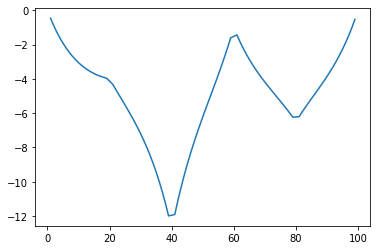

In [12]:
plt.plot(unknown_indexes, esp_cond)

### Variance conditionnelle

In [14]:
cov_cond = cov_inc - np.dot(np.dot(cov_inc_obs, np.linalg.inv(cov_obs)), cov_obs_inc) # problème rencontré : cette matrice n'est pas symétrique, après vérification, cela est sûrement dû à une erreur d'arrondi. Idée : corriger cette erreur (cf ci-dessous)
cov_cond = (1/2)*(cov_cond + np.transpose(cov_cond))
var_cond = np.diag(cov_cond)

print(f"matrice de covariance conditionnelle = {cov_cond}")
print(f"variance conditionnelle = {var_cond}")

matrice de covariance conditionnelle = [[ 2.16624554e+00  1.95016959e+00  1.75361159e+00 ...  1.62630326e-19
   9.21571847e-19  0.00000000e+00]
 [ 1.95016959e+00  3.91985713e+00  3.52477392e+00 ... -1.08420217e-19
   8.13151629e-19  9.21571847e-19]
 [ 1.75361159e+00  3.52477392e+00  5.33121337e+00 ... -8.67361738e-19
  -1.62630326e-19  1.08420217e-19]
 ...
 [ 1.62630326e-19 -1.08420217e-19 -8.67361738e-19 ...  5.33121337e+00
   3.52477392e+00  1.75361159e+00]
 [ 9.21571847e-19  8.13151629e-19 -1.62630326e-19 ...  3.52477392e+00
   3.91985713e+00  1.95016959e+00]
 [ 0.00000000e+00  9.21571847e-19  1.08420217e-19 ...  1.75361159e+00
   1.95016959e+00  2.16624554e+00]]
variance conditionnelle = [2.16624554 3.91985713 5.33121337 6.45695694 7.34226788 8.02267682
 8.52549097 8.87089003 9.07273607 9.13912987 9.07273607 8.87089003
 8.52549097 8.02267682 7.34226788 6.45695694 5.33121337 3.91985713
 2.16624554 2.16624554 3.91985713 5.33121337 6.45695694 7.34226788
 8.02267682 8.52549097 8.870890

#### Tracé de la variance conditionnelle en fonction de la position

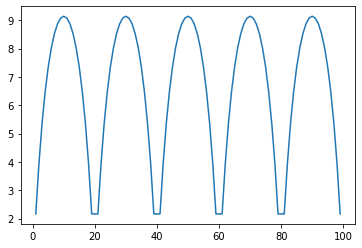

In [15]:
plt.plot(unknown_indexes, var_cond)

La variance conditionnelle est d'autant plus élevée qu'on s'éloigne des positions où la profondeur est connue. En ces points d'observation, la variance doit être nulle : les profondeurs connues $(Z(x_{j_1}), \ldots, Z(x_{j_n}))$ où ${j_1, \ldots, j_n} =$ sont les indices des positions d'observation sont des variables alétoires presque sûrement constantes.

### Simulation conditionnelle

On applique l'algorithme décrit dans la question n°4 de la partie théorique.

In [16]:
Y=np.random.normal(0,1,95) #simule un vesteur gaussien de même taille k que unknown_indexes,ave k variables aléatoires indépendantes suivant une loi normale centrée réduite 

depth_inc = esp_cond + np.dot(np.linalg.cholesky(cov_cond), Y) #simulation conditionnelle du vecteur des profondeurs inconnues, en suivant le calcul décrit dans la question théorique numéro 3
depth_tot = list(depth_inc)
for i in observation_indexes : #le but de cette boucle est de compléter le vecteur des profondeurs inconnues en y insérant aux bonnes positions les profondeurs connues
    depth_tot = depth_tot[:i] + [depth[i//20]] + depth_tot[i:]

Z = np.array(depth_tot) # ainsi, Z est le vecteur des profondeurs (connues et simulées) : on a la profondeur pour tous les points indexés

print(f"vecteur des profondeurs : {Z}")

vecteur des profondeurs : [  0.          -0.41390659  -0.24757701  -2.34846893  -2.88483738
  -3.70103602  -3.39300925  -4.74209897  -5.22177985  -5.36259599
  -2.76717785  -2.88993947  -2.35677933  -3.30091073  -2.49248036
  -3.20468935  -4.6513657   -3.45057568  -3.43669622  -4.20627895
  -4.          -0.57013134  -2.32576749  -3.96295599  -6.22170848
  -5.82325079  -6.14773083  -6.13166785  -6.97167189  -7.52967446
  -8.77668391 -10.32973402 -12.12140348 -11.68802703 -11.4519365
 -12.55777629 -13.07911228 -13.8042294  -14.17219442 -12.97136014
 -12.8        -10.24243453  -9.29917152 -10.03923247 -11.30271297
 -11.45584044  -8.29507743  -6.92508994  -9.77983762  -8.9045325
  -8.09507709  -7.16311604  -7.91564312  -5.93930126  -6.50902252
  -5.01516887  -2.19411717  -3.13478002  -1.74295316  -4.42734308
  -1.          -1.37538103  -2.67844818  -4.17152273  -4.43680146
  -4.77039252  -6.89416335  -7.75568953  -6.80978591  -6.49951233
  -7.70391876  -6.73083775  -5.9558808   -4.68577894

#### Tracé de la simulation conditionnelle et de l'espérance conditionnelle

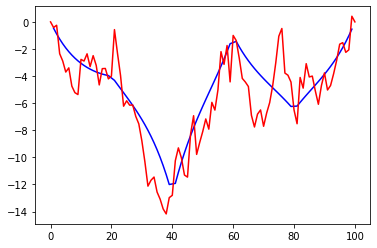

In [18]:
plt.plot(unknown_indexes, esp_cond, color = 'b') #espérance conditionnelle en bleu
plt.plot(np.linspace(0,100,101), Z, color = 'r') #simulation en rouge

On remarque que la simulation "suit" l'espérance conditionnelle : les valeurs obtenues restent groupées autour de l'espérance conditionnelle. La valeur prise en un point x par l'espérance conditionnelle est en effet la plus probable : cela est dû au fait qu'on simule ici un vecteur gaussien.